## Curse of dimensionality

There are many formulations of the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality), but they all boil down to a similar problem. When we shift our reasoning from the three dimensional world we live in on a daily basis to the realm of hundreds or thousands of dimensions where Big Data lives. 

The basic problem is that we usually want to say wether or not two points are "close" or "far." For the two dimensional case, you probably learned how to calculate the distance between two points in grade school.

Let's consider two points in $\mathbb{R}^2$. 

$$ A = [1,2], B = [2,5]$$  
The Euclidean distance between $A$ and $B$, written $ || A - B ||^2_2 $, is equal to $\sqrt{(A_1 - B_1)^2 + (A_2 - B_2)^2}$ or $\sqrt{(1 - 2)^2 + (2 - 5)^2} \approx 3.16$.

As you can see, it's relatively straightfoward to calculate the distance between two points. How can we relate this to a notion of "close" vs "far"? First, we must recognize that these are relative terms. To see what this means, let's consider the following collection of points in $\mathbb{R}^2$.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

font = {'size'   : 14}
mpl.rc('font', **font)

import seaborn as sns

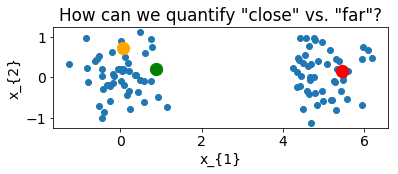

In [9]:
# Set random seed to ensure same results across runs
np.random.seed(0)

# Create a Gaussian ball centered at (0,0)
ball_left = np.random.normal(0, 0.5, size=(50,2))

# Create a Gaussian ball centered at (5,0)
ball_right = np.random.normal([5,0], 0.5, size=(50,2))

# Join the data into a single array of shape [125,2]
data = np.vstack([ball_left, ball_right])

# Pick the three points we're concerned about
green_point = 0
orange_point = 5
red_point = 85

# Plot the data
fig, ax = plt.subplots(1)

ax.scatter(data[:,0], data[:,1])
ax.scatter(data[green_point,0], data[green_point,1], color='green', s=150)
ax.scatter(data[orange_point,0], data[orange_point,1], color='orange', s=150)
ax.scatter(data[red_point,0], data[red_point,1], color='red', s=150)

# Decorate the axes
ax.set_aspect(1)
ax.set_xlabel('x_{1}')
ax.set_ylabel('x_{2}')
ax.set_title('How can we quantify "close" vs. "far"?'); # closing semi-colon prevents printing the text 

Here we've got 100 points total, but let's focus on three: the orange, green, and red points. Intuitively, we can see that the green and orange points are "close" and the red point is "far". How can we quantify this?

One apporach would be to take some number of neighbors, let's call it $k$,  and calculate the Euclidean distance to the $k$th neighbor.

Algorithmically, one does this by first calculating all pairwise distances between points, and then sorting the distances in each row.

We can calculate pairwise distances using a function called `scipy.spatial.distance.pdist()`.

In [10]:
from scipy.spatial.distance import pdist, squareform

# pdist only returns unique pariwise distances to save memory
# remember dist(a,b) = dist(b,a))
# squareform converts this to a matrix that we can visualize
pairwise_distances = squareform(pdist(data))

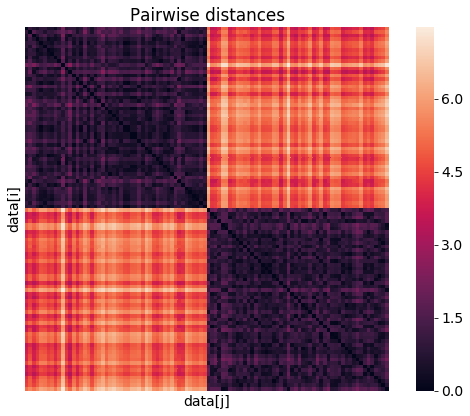

In [11]:
# Seaborn has a nice heatmap function
ax = sns.heatmap(pairwise_distances)

# Plot decorations
ax.set_title('Pairwise distances')
ax.set_xlabel('data[j]'); ax.set_ylabel('data[i]')
ax.set_xticks([]); ax.set_yticks([]);
ax.set_aspect(1)

fig = ax.figure
fig.set_size_inches(8,6)
fig.tight_layout()

#### Interpreting the heatmap

In the above plot, we can see all of the pairwise distance between cells. Each square in the heatmap is distance between those two points. Note that the diagonal line is all 0. We also notice a distinct block-like structure in the diagram. The dark purple blocks indicate small distances between points within the left cluster (upper left) and between points within the right cluster (lower right). The upper right and lower left halves are orange and indicate relatively larger distances between the left and right clusters.

Here you can already generate an idea of what a "close" vs "far" distance is. Close is purple and far is orange! Let's continue to look at the relative distances for the orange to green and orange to red points



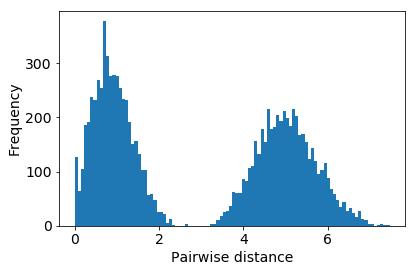

In [12]:
fig, ax = plt.subplots(1, figsize=(6,4))

# This creates the histogram
ax.hist(pairwise_distances.flatten(), bins=100)

# Plot decorations
ax.set_xlabel('Pairwise distance')
ax.set_ylabel('Frequency')

fig.tight_layout()

#### Interpreting the histogram

In the above plot, we can see the frequency of each of the pairwise distance between cells. This plot is strikingly bimodal, and this makes sense for the data. We generally expect the distances within a cluster to be small and distances between clusters to be large. This corresponds to the left and right peak respectively.

Here you can already generate an idea of what a "close" vs "far" distance is. Let's continue to look at the relative distances for the orange to green and orange to red points.

#### Calculating the k-NearestNeighbor

In [13]:
# Here, we're going to do something a little complicated.
# First, we're going to get the indicdes that would 
# sort the distance matrix using `np.argsort()`.

# For example, if `a = np.array([4,2,6])`
# np.argsort(a) -> [1,2,0]
sort_indices = np.argsort(pairwise_distances,  axis=1 )

# Find the kth neighbor
k = 5
# Why do we add 1 to k here?
knn = sort_indices[:,:k+1]

#### Plotting k-NN relationships

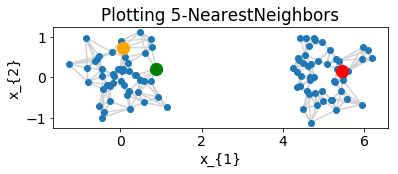

In [15]:
# Plot the data
fig, ax = plt.subplots(1)

ax.scatter(data[:,0], data[:,1])
ax.scatter(data[green_point,0],  data[green_point,1], color='green', s=150)
ax.scatter(data[orange_point,0], data[orange_point,1], color='orange', s=150)
ax.scatter(data[red_point,0],    data[red_point,1], color='red', s=150)

# This block of code draws lines between each point and its k-nearest neighbors
for i, pt in enumerate(data):
    neighbors = knn[i]
    for nn in neighbors:
        nn_coordinates = data[nn]
        ax.plot([pt[0], nn_coordinates[0]], [pt[1], nn_coordinates[1]],
               color='lightgrey', zorder=0)


# Decorate the axes
ax.set_aspect(1)
ax.set_xlabel('x_{1}')
ax.set_ylabel('x_{2}')
ax.set_title('Plotting {}-NearestNeighbors'.format(k)); 

#### Interpreting the k-NN plot

The reason we plotted these relationships to illustrate an important point. **None of the lines connect the two clusters.** This is important for reasons that will become more clear later. For now, what important is that we don't ever observe data between these two clusters. See for yourself, how large can you make `k` before lines start connecting the clusters?



## What happens as dimensionality gets large?

# Notes to self on this lesson


How clear is the notion of wanting near vs far distances?  Should we talk about near vs far points? Should we just say "for now, let's just suspend disbelief and assume that we want to find near vs far? What should the introduction be? Should we show the Waddington landscape?